# Plane Symmetric Self-Gravitating Fluids with Pressure Equal to Energy Density Tabensky Taub
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 25, 2022

You can find this paper on project euclid.  Just getting started, will come back and redo another time

https://link.springer.com/article/10.1007/BF01661153

In [78]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [79]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [80]:
T,X,Y,Z,dT,dX,dY,dZ = symbols('T X Y Z dT dX dY dZ')

In [81]:
phi = Function('phi')(T,Z)
phi

In [82]:
psi = Function('psi')(T,Z)
psi

In [83]:
#  We use undercase r here and reserve upper case R for Ricci
r = Function('r')(T,Z)
r

In [84]:
variables = Matrix([T,X,Y,Z])
variables

⎡T⎤
⎢ ⎥
⎢X⎥
⎢ ⎥
⎢Y⎥
⎢ ⎥
⎣Z⎦

In [85]:
differentials = Matrix([dT,dX,dY,dZ])
differentials 

⎡dT⎤
⎢  ⎥
⎢dX⎥
⎢  ⎥
⎢dY⎥
⎢  ⎥
⎣dZ⎦

In [86]:
lineElement = expand(  exp(2*phi)*dT**2 - exp(2*psi)*dZ**2 - r**2*(dX**2 + dY**2) ) 
lineElement

In [87]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅φ(T, Z)                                   ⎤
⎢ℯ               0          0           0     ⎥
⎢                                             ⎥
⎢              2                              ⎥
⎢    0       -r (T, Z)      0           0     ⎥
⎢                                             ⎥
⎢                         2                   ⎥
⎢    0           0      -r (T, Z)       0     ⎥
⎢                                             ⎥
⎢                                    2⋅ψ(T, Z)⎥
⎣    0           0          0      -ℯ         ⎦

In [88]:
import sympy

In [89]:
m = sympy.Array(g)
m

⎡ 2⋅φ(T, Z)                                   ⎤
⎢ℯ               0          0           0     ⎥
⎢                                             ⎥
⎢              2                              ⎥
⎢    0       -r (T, Z)      0           0     ⎥
⎢                                             ⎥
⎢                         2                   ⎥
⎢    0           0      -r (T, Z)       0     ⎥
⎢                                             ⎥
⎢                                    2⋅ψ(T, Z)⎥
⎣    0           0          0      -ℯ         ⎦

In [90]:
from einsteinpy.symbolic import *

In [91]:
syms = sympy.symbols("T X Y Z")
T,X,Y,Z = syms

In [92]:
metric = MetricTensor(m,syms)

In [93]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢⎡∂                                                                                         
⎢⎢──(φ(T, Z))                 0                                0                            
⎢⎢∂T                                                                                        
⎢⎢                                                                                          
⎢⎢                      -2⋅φ(T, Z) ∂                                                        
⎢⎢     0       r(T, Z)⋅ℯ          ⋅──(r(T, Z))                 0                            
⎢⎢                                 ∂T                                                       
⎢⎢                                                                                          
⎢⎢                                                       -2⋅φ(T, Z) ∂ 

In [94]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛  ⎛                            2         ⎞              ⎛⎛                                
⎢⎜  ⎜∂           ∂              ∂          ⎟  2⋅ψ(T, Z)   ⎜⎜∂           ∂             ⎛∂    
⎢⎜2⋅⎜──(φ(T, Z))⋅──(r(T, Z)) - ───(r(T, Z))⎟⋅ℯ          + ⎜⎜──(φ(T, Z))⋅──(ψ(T, Z)) - ⎜──(ψ(
⎢⎜  ⎜∂T          ∂T              2         ⎟              ⎜⎜∂T          ∂T            ⎝∂T   
⎢⎝  ⎝                          ∂T          ⎠              ⎝⎝                                
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

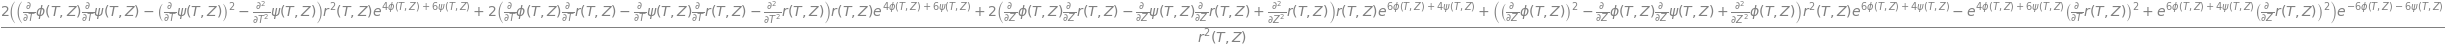

In [95]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [96]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛  ⎛                            2         ⎞              ⎛⎛                                
⎢⎜  ⎜∂           ∂              ∂          ⎟  2⋅ψ(T, Z)   ⎜⎜∂           ∂             ⎛∂    
⎢⎜2⋅⎜──(φ(T, Z))⋅──(r(T, Z)) - ───(r(T, Z))⎟⋅ℯ          + ⎜⎜──(φ(T, Z))⋅──(ψ(T, Z)) - ⎜──(ψ(
⎢⎜  ⎜∂T          ∂T              2         ⎟              ⎜⎜∂T          ∂T            ⎝∂T   
⎢⎝  ⎝                          ∂T          ⎠              ⎝⎝                                
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [97]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [98]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [99]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛  ⎛                            2         ⎞              ⎛⎛                                
⎢⎜  ⎜∂           ∂              ∂          ⎟  2⋅ψ(T, Z)   ⎜⎜  ∂           ∂             ⎛∂  
⎢⎜2⋅⎜──(φ(T, Z))⋅──(r(T, Z)) - ───(r(T, Z))⎟⋅ℯ          - ⎜⎜- ──(φ(T, Z))⋅──(ψ(T, Z)) + ⎜──(
⎢⎜  ⎜∂T          ∂T              2         ⎟              ⎜⎜  ∂T          ∂T            ⎝∂T 
⎢⎝  ⎝                          ∂T          ⎠              ⎝⎝                                
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [100]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡    ⎛                                                                          2           
⎢    ⎜             2⋅φ(T, Z) ∂           ∂                          2⋅φ(T, Z)  ∂            
⎢1.0⋅⎜2.0⋅r(T, Z)⋅ℯ         ⋅──(ψ(T, Z))⋅──(r(T, Z)) - 2.0⋅r(T, Z)⋅ℯ         ⋅───(r(T, Z)) +
⎢    ⎜                       ∂Z          ∂Z                                     2           
⎢    ⎝                                                                        ∂Z            
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

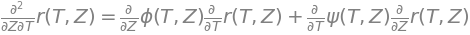

In [101]:
Eq(ricciSimplified[0,3].args[2].args[0].args[1],solve(ricciSimplified[0,3], ricciSimplified[0,3].args[2].args[0].args[1] )[0] )  

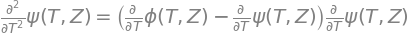

In [135]:
d2psidt2 = Eq(diff(psi,T,T),solve( ricciSimplified[0,0].args[1].args[0].args[1].args[0].args[0], diff(psi,T,T) )[0] ) 
d2psidt2

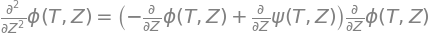

In [140]:
Eq(diff(phi,Z,Z) , solve( ricciSimplified[0,0].args[1].args[0].args[1].subs(d2psidt2.lhs,d2psidt2.rhs).simplify().args[0], diff(phi,Z,Z) )[0] ) 